# Python Basics

Python is a **high-level, interpreted, and dynamically typed programming language** widely used in scientific computing, data analysis, artificial intelligence, and automation.  
Its design philosophy emphasizes **readability** and **conciseness**.

## 1. Key Features
- **Interpreted**: No compilation step; code runs directly via the Python interpreter.
  
- **Dynamically Typed**: Variable types are inferred at runtime.
- **Multi-paradigm**: Supports procedural, object-oriented, and functional programming.
- **Rich Ecosystem**: Thousands of libraries for scientific research (NumPy, pandas, PyTorch, etc.).

## 2. Quick examples of Python syntax

#### Variable assignment:
```python
# This is a comment
x = 10  # Variable assignment
y = 20  # Another variable assignment
z = x + y  # Variable assignment with expression

#### If/else statements:
```python
if x > y:
    print("x is greater than y")
else:
    print("y is greater than or equal to x")


### While loop:
```python
while x < 20:
    print(x)
    x += 1  # Increment x by 1


#### For loops:
```python
for i in range(5):
    print(i)  # Prints numbers from 0 to

#### For each loops:
```python
my_list = [1, 2, 3, 4, 5]
for item in my_list:
    print(item)  # Prints each item in the list

## 3. Lists, Sets and Dictionaries

#### Lists:

Lists are ordered collections of items that can be of different types. They are mutable, meaning you can change their content.
```python
my_list = [1, 2, 3, 4, 5]
my_list.append(6)  # Add an item to the list
my_list.remove(3)  # Remove an item from the list
print(my_list)  # Prints the modified list

#### Sets:
Sets are unordered collections of unique elements. They are useful for membership testing and eliminating duplicate entries.
```python
my_set = {1, 2, 3, 4, 5}
my_set.add(6)  # Adding an element
my_set.remove(3)  # Removing an element
print(my_set)  # Prints the set

You can also initialize a set from a list, removing duplicates:
```python
my_list = [1, 2, 2, 3, 4]
my_set = set(my_list)
print(my_set)

#### Dictionaries:
Dictionaries are collections of key-value pairs, allowing for fast lookups by key.
```python
my_dict = {'a': 1, 'b': 2, 'c': 3}
my_dict['d'] = 4  # Adding a new key-value pair
print(my_dict['a'])  # Accessing a value by key

You can also initialize a dict with a comprehension:
```python
my_dict = {x: x**2 for x in range(5)}

## 4. Little introduction to pandas

Main value of pandas is its ability to handle and manipulate structured data efficiently.

```python
import pandas as pd
# Creating a DataFrame
data = {    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'City': ['New York', 'Los Angeles', 'Chicago'],
    'height': [5.5, 6.0, 5.8],
    'weight': [130, 180, 150]}
df = pd.DataFrame(data)
print(df)  # Displays the DataFrame

You can store the data into a list and of dictionaries and then convert it into a DataFrame:

```python
list_names = ['Alice', 'Bob', 'Charlie']
data_to_df = []

for i, name in enumerate(list_names):
    data_to_df.append({'index': i, 'name': name})

df = pd.DataFrame(data_to_df)

We can manipulate the columns of the DataFrame:

```python
# Adding a new column
df['BMI'] = df['weight'] / (df['height'] ** 2)
print(df)

We can also perform operations like filtering, grouping, and aggregating data.

```python
# Filtering rows where Age is greater than 28
filtered_df = df[df['Age'] > 28]
print(filtered_df)
# Grouping by City and calculating the average Age
grouped_df = df.groupby('City').agg({'Age': 'mean', 'height': 'mean', 'weight': 'mean'}).reset_index()
print(grouped_df)

## 5. Little tutorial of networkx

To create a random netwwwork, like an Erdös Renyi graph:

```python
my_network = nx.erdos_renyi_graph(n=initial_population, p=0.0005) 



Now we can add an attribute to all the nodes, for instance, the weight:

```python
nx.set_node_attributes(my_network, 1.0, 'weight')


If we want to access and change that attribute, we can just:

```python
my_newtork.nodes[node]['weight']  = 5.0 


We can also loop through the nodes and through the neighbours of a node as: 

```python
# Loop through the nodes
for node in my_network.nodes():
    print(node)

# Loop through the neighbours
for neighbour in my_network.neighbors(node):
    print(neighbour)

# Quick SIR Recap

We are going to use the SIR model to simulate the spread of a disease in a well-mixed population. The SIR model is a simple compartmental model that divides the population into three compartments:  

- Susceptible (S)
- Infected (I)
- Recovered (R)

The model assumes that individuals can move between these compartments based on certain rates.
Those rates are:


- $\beta$ : Infectivity rate.
- $\mu$ : Recovery rate.

# Simulations

With this introduction, we can start to code our simulations.

First, we will import the necessary libraries for all the simulations:


In [1]:
import numpy as np
import pandas as pd 
import random
import networkx as nx

from plot_functions import plot_well_mixed_ODES, plot_well_mixed_stochastic, plot_well_mixed_Gillespie, plot_stochastic_networks, plot_networks_Gillespie

Once we have the libraries imported, we can set the initial population parameters for our simulations.


In [2]:
initial_population = 10000  # Total population
fraction_infected = 0.02
initial_infected = int(initial_population * fraction_infected)  # Initial number of infected individuals
initial_recovered = 0  # Initial number of recovered individuals
initial_susceptible = initial_population - initial_infected - initial_recovered  # Initial number of susceptible individuals


We can also set the rates for the SIR model, which will be used in our simulations.

In [3]:
beta = 0.15 # Infectivity rate
mu = 0.1  # Recovery rate
delta_t = 1  # Time step for the simulation

These are the mcontrol parameters we will need to run our simulations.

As we will use different simulation methods, we may need to add a couple of additional parameters in some scenarios.


# Well mixed population Simulations

Let's start with the simplest model, a well mixed population.

In a well-mixed population, every individual has an equal chance of interacting with every other individual in the system. 

One way of simulating it is by solving the differential equations of the SIR model.

## 1. Well mixed population with ODEs

The diferencial equations governing the SIR model are:
- $\dfrac{dS}{dt} = -\beta \cdot S \cdot \dfrac{I}{N}$

- $\dfrac{dI}{dt} = \beta \cdot S \cdot \dfrac{I}{N} - \mu \cdot I$

- $\dfrac{dR}{dt} = \mu \cdot I$


Where:
- $S$: Number of susceptible individuals.
- $I$: Number of infected individuals.
- $R$: Number of recovered individuals.
- $N$: Total population size (constant).

By solving these equations, we can obtain the time evolution of the compartments in the SIR model.

We are going to solve them using Euler's method. This method approximates the solution by iterating over small time steps.

As an example, if we have the position differential equation in the URM:

$$\dfrac{dx}{dt} = v(t)$$

Then, the position $x(t + \Delta t)$ of a particle at time $t + \Delta t$ can be approximated as:

$$x(t + \Delta t) \approx x(t) + v(t) \Delta t$$

where $v(t)$ is the velocity of the particle at time $t$ and $\Delta t$ is a small time step. Leveraging this idea, we can solve the SIR model equations.



Then, the simulation can be implemented as follows:

1. Initialize the population.
   
2. Set time to 0.
3. Set the time step.
4. Apply the Euler's method to update the compartments based on the rates.
5. Update the simulation time.
6. Store the data for the current time step (Time, Susceptible, Infected, Recovered) in a list.
7. Repeat from 3. to 6. until the stopping condition is reached.
8. Convert the list of data into a Pandas DataFrame for easier analysis and visualization.
9. Plot the epidemic curves using `plot_well_mixed_ODES`.

* NOTE: The time series simulation data should be stored in a structured format with the columns (Time, Susceptible, Infected, Recovered)

We set the initial parameters

In [4]:
S = initial_susceptible  # Susceptible individuals
I = initial_infected  # Infected individuals
R = initial_recovered  # Recovered individuals
N = initial_population  # Total population

simulation_time = 0 

delta_t = 1  # Time step for the simulation

In [5]:
#Initialize the list with data
data_ODES = []

We run the simulation

In [6]:
epsilon = 1 # Small value to prevent division by zero
while I > epsilon:
    # Compute derivatives from current state
    dS = -beta * S * I / N
    dI = beta * S * I / N - mu * I
    dR = mu * I
    
    # Update all compartments simultaneously
    S += dS * delta_t
    I += dI * delta_t
    R += dR * delta_t

    # Update simulation time
    simulation_time += delta_t

    # Append current state to the data list
    data_ODES.append({'Time': simulation_time, 'Susceptible': S, 'Infected': I, 'Recovered': R})

print(f'final state: S={S}, I={I}, R={R}')

# Convert the data list to a DataFrame
df_ODES = pd.DataFrame(data_ODES)


final state: S=3926.7174989210457, I=0.9698270264987751, R=6072.312674052466


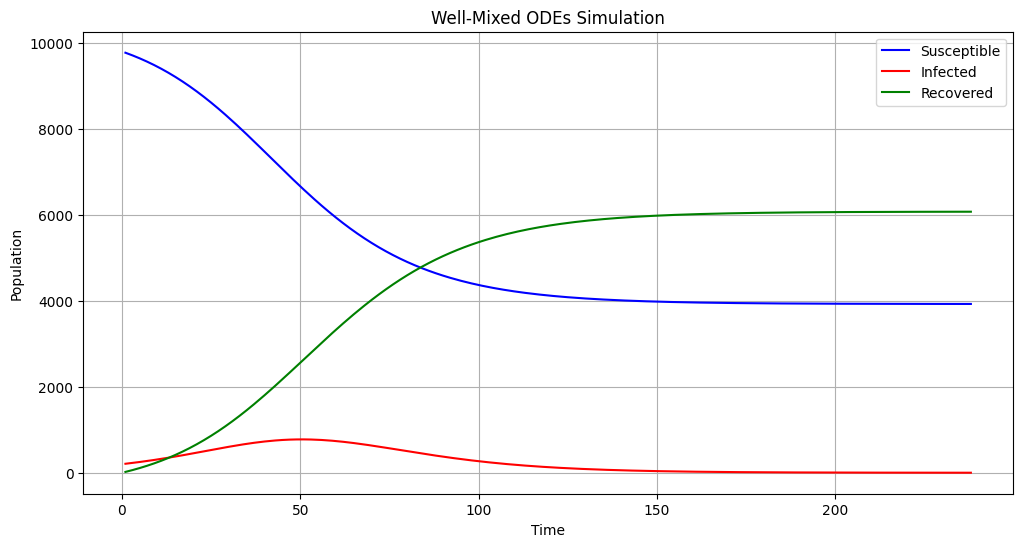

In [7]:
plot_well_mixed_ODES(df_ODES)

Solving the ODEs numerically using the Euler method gives us an approximate solution for the dynamics of the compartments over time. But deterministic Euler solves the average SIR trajectory; it will always grow if $R_0>1$.

To account for the stochastic nature of the epidemic, we can use a Monte Carlo simulation approach.


## 2. Well mixed population with Monte Carlo

As epidemic diffusion is not a deterministic process, to simulate the stochastic nature of the epidemic, we can use a Monte Carlo simulation approach.

To compute the probability of infection, we can use the mass-action formula:
$$ P(S \to I) = 1 - \exp(-\beta \cdot I / N) $$


Then, in each step, the new number of infected individuals can be obtained by sampling from a binomial distribution:
$$ I_{new} = \text{Binomial}(S, P(S \to I)) $$

In the recovery phase, the probability of recovery is just $\mu$, then the new number of recovered individuals can be obtained by sampling from another binomial distribution:
$$ R_{new} = \text{Binomial}(I, P(I \to R)) $$

As the model is stochastic, we can do more than one simulation to have more samples in order to analyze the results.

In [8]:
Nsims = 10  # Number of simulations for the stochastic model
data_stochastic_well_mixed = [] #We need a variable to store the data for the stochastic well-mixed model
tracking_data_stochastic_well_mixed = []

In addition, we can also track the events of infections and recoveries by randomly sampling the people in the population. For this, we will need two sets:
- S_set: Susceptible individuals.
- I_set: Infected individuals.


Then, the steps for each simulation iteration are as follows:
1. Initialize the population; S, I, R and N variables.
   
2. Initialize the time to zero.
3. Initialize the sets S_set andd I_set where we will store the individuals in each compartment.
4. Compute the infection and recovery probabilities.
5. Sample the number of new infections and recoveries.
6. Update population variables.
7. Update simulation time.
8. OPTIONAL:For each new infection, randomly sample an individual from S_set and move it to I_set.
9. OPTIONAL: For each recovery, randomly sample an individual from I_set and remove him.
10. OPTIONAL: You should store the event information in a list with columns: 'Simulation', 'Event', 'Time', 'Infector', 'Infected', 'Recovered'.
11. Store the time series data.
12. Repeat steps 4 to 11 for until the stopping condition is reached.
13. Repeat all the steps for every simulation you do.
14. Convert both list to pandas Dataframes.
15. Visualize the epidemic curves the plotting function `plot_well_mixed_stochastic`
* NOTE: The time series simulation data should be stored in a structured format with the columns (Simulation, Time, Susceptible, Infected, Recovered) and the Tracking data should have the columns (Simulation, Time, Event, Infector, Infected, Recovered), where the column 'Event' indicates the type of event (infection or recovery) and depending on the event type, the 'Infector' and 'Infected' or 'Recovered' columns may be filled or left empty.

#### Hints

You can use the functions:

```python
np.random.choice() # Choose one element from a list
np.random.binomial()# Sample from a binomial

In [9]:
# Loop over the number of simulations
for sim in range(Nsims):
    print(f'Simulation {sim + 1}/{Nsims}')

    # Reset the compartments for each simulation
    S = initial_susceptible
    I = initial_infected
    R = initial_recovered
    N = initial_population

    # Reset simulation time
    simulation_time = 0

    # Initialize the sets for each compartment
    S_set = set(range(initial_susceptible))  # Susceptible individuals
    I_set = set(range(initial_susceptible, initial_susceptible + initial_infected))  # Infected individuals
    R_set = set(range(initial_susceptible + initial_infected, initial_population))  # Recovered individuals

    # Run the simulation until the stopping condition is reached
    while I > 0:
        # Compute the probabilities of infection and recovery
        p_inf = 1 - np.exp(-beta * I / N)
        p_rec = 1 - np.exp(-mu)

        # Simulate the stochastic process
        new_infections = np.random.binomial(S, p_inf)
        new_recoveries = np.random.binomial(I, p_rec)

        # Update the compartments
        S -= new_infections
        I += new_infections - new_recoveries
        R += new_recoveries

        # Update simulation time
        simulation_time += delta_t

        # Track the events of infections and recoveries
        # Infections
        for infection in range(new_infections):
            if S_set:
                # Randomly choose a susceptible individual
                susceptible_individual = random.choice(list(S_set))

                # Randomly choose an infected individual
                infected_individual = random.choice(list(I_set)) if I_set else None

                # Update the sets
                S_set.remove(susceptible_individual)
                I_set.add(susceptible_individual)

                # Append the current state to the tracking data
                tracking_data_stochastic_well_mixed.append({
                    'Simulation': sim,
                    'Time': simulation_time,
                    'Event': 'Infection',
                    'Infector': infected_individual,
                    'Infected': susceptible_individual
                })
        #TODO: We need to remove new infected in recoveries
        # Recoveries
        for recovery in range(new_recoveries):
            if I_set:
                # Randomly choose an infected individual
                infected_individual = random.choice(list(I_set))

                # Update the sets
                I_set.remove(infected_individual)
                R_set.add(infected_individual)
                
                # Append the current state to the tracking data
                tracking_data_stochastic_well_mixed.append({
                    'Simulation': sim,
                    'Time': simulation_time,
                    'Event': 'Recovery',
                    'Recovered': infected_individual
                })

        # Append the final state to the data list
        data_stochastic_well_mixed.append({'Simulation': sim, 'Time': simulation_time, 'Susceptible': S, 'Infected': I, 'Recovered': R})


Simulation 1/10
Simulation 2/10
Simulation 3/10
Simulation 4/10
Simulation 5/10
Simulation 6/10
Simulation 7/10
Simulation 8/10
Simulation 9/10
Simulation 10/10


In [10]:
# Convert the data list to a DataFrame
df_stochastic_well_mixed = pd.DataFrame(data_stochastic_well_mixed)
# Convert the tracking data to a DataFrame
tracking_df_stochastic_well_mixed = pd.DataFrame(tracking_data_stochastic_well_mixed)

/home/marco/china_school/plot_functions.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


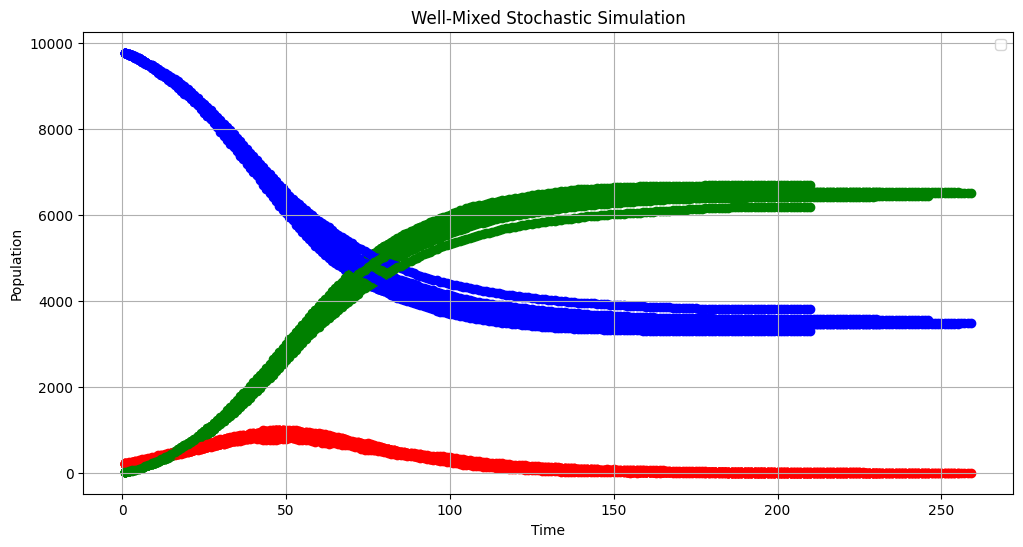

In [11]:
plot_well_mixed_stochastic(df_stochastic_well_mixed)

### Well-mixed population with Gillespie's algorithm

What if we want to simulate the SIR model with continuous time?

For this, we can use the Gillespie algorithm


Now the time step is determined by the sum of the rates of all possible events. The probability density function for the likelihood of observing a waiting time $t$ is given by:
$$ f(t) = \tau_{total} \exp(-\tau_{total} t) $$

Where:
$$ \tau_{total} = \tau_I + \tau_R$$

Where:

$$ \tau_I = \beta S \dfrac{I}{N} \qquad \tau_R = \mu I$$

To sample the time step, we will use the cumulative distribution function (CDF) method. The steps to follow are:

1. Compute the cumulative distribution function, $F(t)$.
2. Given that $F(t)$ is between 0 and 1, we have that $F(t_1) = w$, where $w$ is a random number between 0 and 1.
3. Find the value of $t_1$ such that $F(t_1) = w$.
4. The time step is then given by $\Delta t = t_1$.

Once we know how to sample the time step, we can proceed with the simulation. The steps for each simulation iteration are as follows:

1. Find the CDF distribution.
1. Initialize the population.
   
2. Calculate the total rate of events, infections and recoveries.
3. Sample the time step using the CDF method.
4. Choose the event to execute based on the rates (with a uniform random number).
5. Update the sets based on the event executed.
6. Store the time series data (Simulation, Time, Susceptible, Infected, Recovered) for the Gillespie well-mixed model.
7. Repeat steps from 3 to 7 until the stopping condition is reached.
8. Repeat all steps for every simulation.
9. Create a pandas Dataframe from the lists and plot it with `plot_well_mixed_Gillespie`.
   
* NOTE: The time series simulation data should be stored in a structured format with the columns (Simulation, Time, Susceptible, Infected, Recovered)

You can use the functions:

```python
random.random()# Produce a random uniform number

In [12]:
data_gillespie_well_mixed = []  # We need a variable to store the data for the Gillespie well-mixed model
Nsims = 10  # Number of simulations for the Gillespie well-mixed model

In [13]:
for sim in range(Nsims):
    print(f'Simulation {sim + 1}/{Nsims}')    

    # Reset the compartments for each simulation
    S = initial_susceptible  # Susceptible individuals
    I = initial_infected  # Infected individuals
    R = initial_recovered  # Recovered individuals
    N = initial_population  # Total population

    # Reset simulation time
    time = 0

    # Run the simulation until the stopping condition is reached
    while I > 0:
        # Compute both rates, infection and recovery
        infection_rate = beta * S * I / N
        recovery_rate = mu * I

        # Compute total rate
        total_rate = infection_rate + recovery_rate
        if total_rate == 0:
            break

        # Generate a random time until the next event
        time_step = - np.log(1 - random.random()) / total_rate

        # Update time
        time += time_step

        # Choose an event
        if random.random() < infection_rate / total_rate:
            # Infection event
            S -= 1
            I += 1
        else:
            # Recovery event
            I -= 1
            R += 1

        # Store the data for analysis
        data_gillespie_well_mixed.append({'Simulation': sim, 'Time': time, 'Susceptible': S, 'Infected': I, 'Recovered': R})

Simulation 1/10
Simulation 2/10
Simulation 3/10
Simulation 4/10
Simulation 5/10
Simulation 6/10
Simulation 7/10
Simulation 8/10
Simulation 9/10
Simulation 10/10


In [14]:
df_gillespie_well_mixed = pd.DataFrame(data_gillespie_well_mixed)


# Simulation in networks

Real world networks are often complex and heterogeneous, making it necessary to use more sophisticated models to simulate disease spread.

The first step to simulate disease spread in networks is to create a network structure that represents the connections between individuals.

In [15]:
beta = 0.03

In [16]:
# Create the network
network_name = 'erdos'# Change this variable to change the network
if network_name == 'erdos':
    # Create a random graph
  my_network = nx.erdos_renyi_graph(n = initial_population, p = 0.001, seed = 7)
elif network_name == 'barabasi':
  my_network = nx.barabasi_albert_graph(n = initial_population, m = 2, seed = 42)
else:
  print('Choose between erdos and barabasi')


Now we can use the network structure to simulate the disease spread using the SIR model. 

Steps to go:

1. Initialize the state of each node in the network (S, I, R). Randomly assign the infected states to the nodes.

2. Loop through the nodes and check the state of each node.
   1. If the individdual is infected:
      1. Check its neighbors and infect them with a certain probability.
      2. Check if it recovers with a certain probability.    
     
3. Update the state of each node based on the infection and recovery processes.
4. As an optional task store the tracking data for each event.
5. Store the node state for each time step.
6. Store the time series data.
7. Repeat the process for a certain number of iterations or until the disease dies out.
8. Repeat all the steps for every simulation

* Note: Node state data should have the columns (Time, Node, State) and tracking data should have the columns (Simulation, Time, Event, Infector, Infected, Recovered) and the time series should have the columns (Simulation, Time, Susceptible, Infected, Recovered)





You can use the functions:

```python
random.random()# Produce a random uniform number
nx.set_node_attributes()# Assign a state to all the nodes

.to_csv(f'data/{network_name}_node_state.csv') # Save the data into a .csv file

In [17]:
# Initialize data storage
data_stochastic_network = []
tracking_data_stochastic_network = []
node_state_network = []


Nsims = 3

In [18]:
for i in range(Nsims):
    # Initialize all as susceptible
    nx.set_node_attributes(my_network, 'S', 'state')

    # Sample infected nodes
    infected_nodes = np.random.choice(my_network.nodes,
                                    size=initial_infected,
                                    replace=False)

    # Set the state of the infected nodes
    for node in infected_nodes:
        my_network.nodes[node]['state'] = 'I'

    # Set simulation time
    simulation_time = 0


    # Initialize compartments
    N = initial_population
    
    I = int(initial_population * fraction_infected)
    S = initial_population - I
    R = 0

    # Run the simulation until the stopping condition is reached
    while I > 0:
        # Loop through all the nodes
        for node in my_network.nodes:

            # Check if its infected
            if my_network.nodes[node]['state'] == 'I':

                # Check neighbors for susceptible individuals
                for neighbor in my_network.neighbors(node):
                    if my_network.nodes[neighbor]['state'] == 'S':

                        # Check if the infection occurs
                        if random.random() < beta:
                            # Infect the neighbor
                            my_network.nodes[neighbor]['state'] = 'I'

                            # Update compartments
                            S -= 1
                            I += 1

                            # Track the infection event
                            tracking_data_stochastic_network.append({
                                'Simulation': i,
                                'Time': simulation_time,
                                'Event': 'Infection',
                                'Infector': node,
                                'Infected': neighbor
                            })
                # Check if the infected individual recovers
                if random.random() < mu:
                    # Recover the infected individual
                    my_network.nodes[node]['state'] = 'R'

                    # Update compartments
                    I -= 1
                    R += 1

                    # Track the recovery event
                    tracking_data_stochastic_network.append({
                        'Simulation': i,
                        'Time': simulation_time,
                        'Event': 'Recovery',
                        'Recovered': node
                    })

            # Store the state of each node in the network
            node_state_network.append({'Simulation': i, 'Time': simulation_time, 'Node': node, 'State': my_network.nodes[node]['state']})
        # Update simulation time
        simulation_time += delta_t
        
        # Append the current state to the data list
        data_stochastic_network.append({
            'Simulation': i,
            'Time': simulation_time,
            'Susceptible': S,
            'Infected': I,
            'Recovered': R
        })



In [19]:
# Set the datasets
df_stochastic_network = pd.DataFrame(data_stochastic_network)
df_node_state_newtork = pd.DataFrame(node_state_network)
df_node_state_newtork.to_csv(f'node_state_network_{network_name}.csv', index=False)
tracking_df_stochastic_network = pd.DataFrame(tracking_data_stochastic_network)


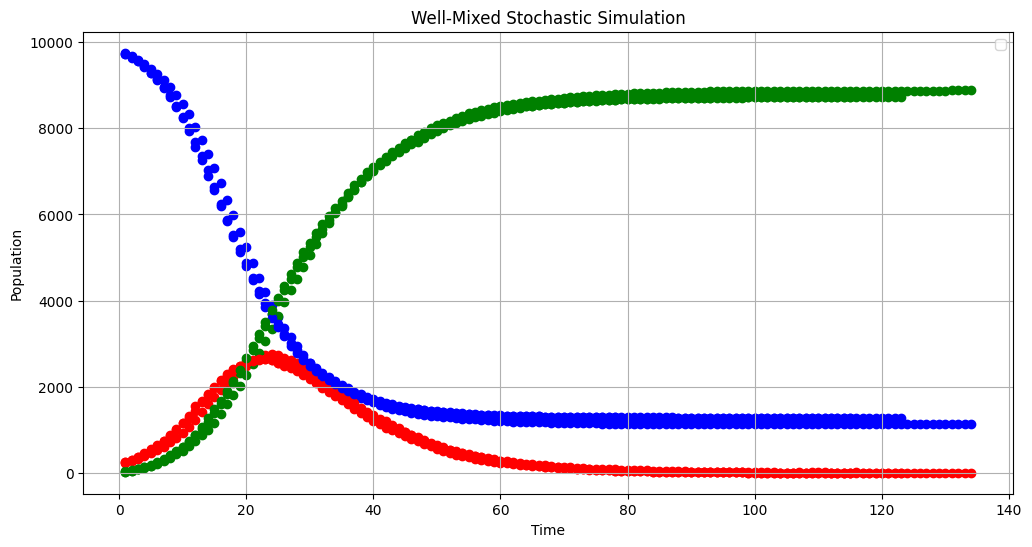

In [20]:
plot_well_mixed_stochastic(df_stochastic_network)

### Gillespie algorithm in Networks

As in the well mixed models, gillespie algorithm allows us to have a continuous time representation of the epidemic process.

The idea is the same, but as we have a network structure, we need to account for the topology of the network when implementing the Gillespie algorithm. This means considering the connections between nodes and the fact that infections can only spread through these connections. 

Now the individuals does not have the same probability of getting infected, this probability should be proportional to the number of infected neighbours of each susceptible node ($prob = \# \text{infected neighbours} \cdot \beta$).


Now the infection rate is:


$$ \tau_I = \# \text{E(I $\rightarrow$ S)} \cdot \beta $$

Steps to go:

1. Initialize the state of each node in the network (S, I, R). Randomly assign states to each node.
   
2. You should have two sets, to track the susceptibles and the infected nodes.
3. Loop through all susceptible nodes and compute their probability of being infected (saving that probabilities in a dict Susceptible : prob).
4. Compute the total infection and recovery rates.
5. Sample the time step until the next event.
6. Choose an event, infection or recovery.
7. If its an infection event, select a susceptible node based on their infection probabilities.
8. If its a recovery event, recover one infected individual.
9. Update the sets.
10. Repeat steps 3 to 9 until the stopping criteria are met.

You can use the functions:

```python
random.random()
np.random.choice()# Choose one element from a list
np.random.choices()# Choose more than one element from a list


In [25]:

# Initialize all as susceptible
nx.set_node_attributes(my_network, 'S', 'state')

# Sample infected nodes
infected_nodes = np.random.choice(my_network.nodes,
                                  size=initial_infected,
                                  replace=False)
for node in infected_nodes:
    my_network.nodes[node]['state'] = 'I'

# Set initial parameters as before 
simulation_time = 0
data_gillespie_network = []  # We need a variable to store the data for the stochastic network model
tracking_data_stochastic_network = []
node_state_network = []

S = initial_susceptible
I = initial_infected
R = initial_recovered
N = initial_population



In [26]:
S_set = set(set(my_network.nodes()) - set(infected_nodes))  # Infected individuals

I_set = set(infected_nodes)  # Infected individuals

while I > 0:
    infection_probability_dict = {Sus: 0 for Sus in S_set}

    for node_at_risk in S_set:
        for neighbour in my_network.neighbors(node_at_risk):
            if my_network.nodes[neighbour]['state'] == 'I':
                infection_probability_dict[node_at_risk] += beta

    infection_rate = sum(infection_probability_dict.values())
    recovery_rate = mu * len(I_set)

    #compute time step
    total_rate = infection_rate + recovery_rate
    if total_rate == 0:
        break
    # Generate a random time until the next event
    time_step = - np.log(1 - random.random()) / total_rate

    simulation_time += time_step

    # Choose the next event
    if random.random() < infection_rate / total_rate:
        # Infection event
        event_type = 'infection'
        sus_nodes = list(infection_probability_dict.keys())
        weights = np.array(list(infection_probability_dict.values()), dtype=float)
        weights /= weights.sum()

        # Choose the infected node
        infected_node = np.random.choice(sus_nodes, p = weights)

        # Update the state
        my_network.nodes[infected_node]['state'] = 'I'

        # Update population variables
        S -= 1
        I += 1

        # Update the Sets
        S_set.remove(infected_node)
        I_set.add(infected_node)
    else:
        # Recovery event
        event_type = 'recovery'

        recovered_node = random.choice(list(I_set))
        my_network.nodes[recovered_node]['state'] = 'R'

        # Update population variables
        R += 1
        I -= 1

        # Update the Sets
        I_set.remove(recovered_node)
    data_gillespie_network.append({'Time': simulation_time, 'Susceptible': S, 'Infected': I, 'Recovered': R})


In [27]:
df_gillespie = pd.DataFrame(data_gillespie_network)

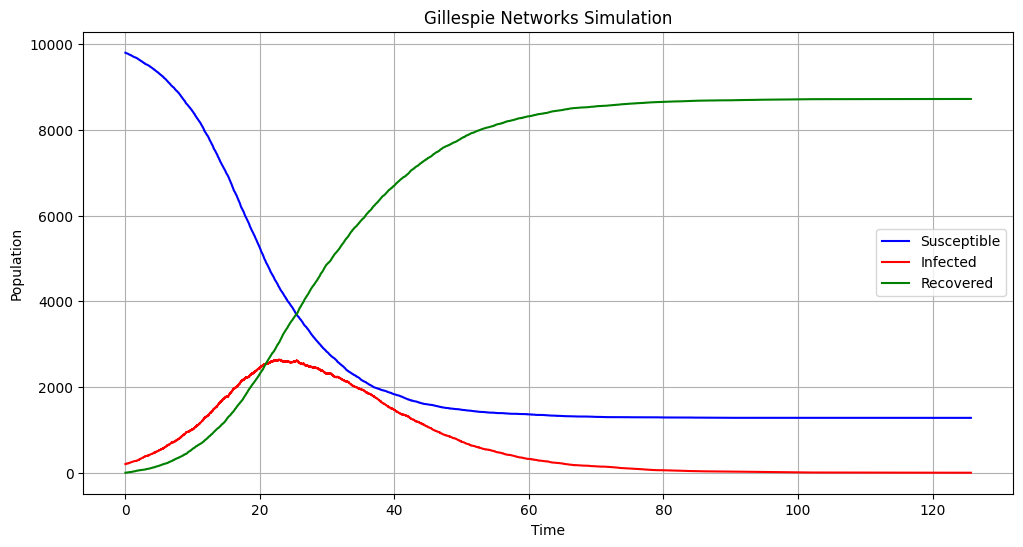

In [28]:
plot_networks_Gillespie(df_gillespie)

### Optimized Gillespie

Tracking the susceptible individuals and checking if they have infected neighbors can be very computationally expensive, especially in large networks.

For that reason, we can apply an optimization in Gillespie algorithm. According to it, we can just track the infected individuals and compute the infection rate as:

$$\tau_{I} = \sum_{v \in N_I} \sum_{i = 0}^{k} \beta$$

Where $N_I$ is the set infected nodes and $k$ is the degree of the node $v$. Basically, what we are computing now is the rate of making an infectious contact, which will lead to an infection only if the target node is susceptible.

The steps are almost the same as in the previous Gillespie algorithm, but with a few modifications. Now you don't need to track the susceptible individuals and there is a infection just if the target node is susceptible.

Steps to follow:
1. Initialize the state of each node in the network (S, I, R). Randomly assign states to each node.
   
2. You should have one set to track infected nodes.

3. Compute the total infection and recovery rates.
4. Sample the time step until the next event.
5. Choose an event, infection or recovery.
6. If its an infection event, select an infected node proportional to their degree, sample one of its neighbours and if its susceptible infect it.
7. Update the set.
8. Repeat steps 3 to 7 until the stopping criteria are met.
9. Convert to a Dataframe and plot it 

You may need to use:

```python
nx.degree()


In [29]:
my_network = nx.erdos_renyi_graph(n=initial_population, p=0.0005)  # Create a random graph

# Initialize all as susceptible
nx.set_node_attributes(my_network, 'S', 'state')

# Sample infected nodes
infected_nodes = np.random.choice(my_network.nodes,
                                  size=initial_infected,
                                  replace=False)
for node in infected_nodes:
    my_network.nodes[node]['state'] = 'I'

# Set initial parameters as before 
simulation_time = 0
data_gillespie_network = []  # We need a variable to store the data for the stochastic network model
tracking_data_stochastic_network = []
node_state_network = []

S = initial_susceptible
I = initial_infected
R = initial_recovered
N = initial_population


Infected_dict = {node: nx.degree(my_network, node) for node in infected_nodes}

simulation_time = 0

In [30]:
while I > 0:
    infection_rate = sum(Infected_dict.values()) * beta
    recovery_rate = mu * I

    total_rate = infection_rate + recovery_rate
    if total_rate == 0:
        break

    # Sample the time until the next event
    time_step = - np.log(1 - random.random()) / total_rate

    simulation_time += time_step

    # Choose an event: infection or recovery
    if np.random.rand() < infection_rate / total_rate:
        # Infection event
        infected_nodes = list(Infected_dict.keys())
        weights = np.array(list(Infected_dict.values()), dtype=float)
        weights /= weights.sum()
        infected_node = np.random.choice(infected_nodes, p=weights)
        neighbors = list(my_network.neighbors(infected_node))
        if neighbors:
            target_node = np.random.choice(neighbors)
            if my_network.nodes[target_node]['state'] == 'S':
                my_network.nodes[target_node]['state'] = 'I'
                Infected_dict[target_node] = nx.degree(my_network, target_node)
                I += 1
                S -= 1
    else:
        # Recovery event
        recovered_node = np.random.choice(list(Infected_dict.keys()))
        my_network.nodes[recovered_node]['state'] = 'R'
        del Infected_dict[recovered_node]
        I -= 1
        R += 1